In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno


In [4]:
col_names=['rayon','cat','sub1','sub2','sub3','sub4','sub5','name','price']
df = pd.read_csv('./data1_all.csv',encoding='utf-8',names = col_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33458 entries, 0 to 33457
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rayon   33458 non-null  object
 1   cat     33458 non-null  object
 2   sub1    33120 non-null  object
 3   sub2    2276 non-null   object
 4   sub3    120 non-null    object
 5   sub4    4 non-null      object
 6   sub5    2 non-null      object
 7   name    33458 non-null  object
 8   price   33458 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


In [6]:
df.sample(10)

,rayon,cat,sub1,sub2,sub3,sub4,sub5,name,price
29554,INFORMATIQUE,Ordinateur de bureau,Ordinateur Gamer,NaN,NaN,NaN,NaN,Pc de Bureau Gamer LENOVO IdeaCentre 14ACN6 AM...,2 499.000 TND
16483,TV | PHOTO & SON,Photos & Caméscopes,Appareil Photo,NaN,NaN,NaN,NaN,Appareil Photo Hybride CANON EOS RP + Objectif...,7 599.000 TND
3555,ÉLECTROMENAGER,Gros Electroménager,Cuisinière,NaN,NaN,NaN,NaN,Cuisinière à gaz ORIENT OC-60-60EB-P 60 cm Blanc,609.000 TND
5931,GAMING,Périphériques et Accessoires Gamers,Clavier Gamer,NaN,NaN,NaN,NaN,Clavier Gamer JEDEL K500 Avec Trois Couleurs -...,18.900 TND
33432,INFORMATIQUE,Ordinateurs portables,Pc Portable,NaN,NaN,NaN,NaN,PC Portable HP Spectre x360 14-ea1002nk i7 11è...,6 579.000 TND
27968,INFORMATIQUE,Stockage,Disque Dur Externe,NaN,NaN,NaN,NaN,Disque Dur Externe HIKVISION T30 2To USB 3.0 -...,212.000 TND
20179,RESEAUX & SECURITE,Reseaux,Accessoires Réseau,NaN,NaN,NaN,NaN,Switch TP-LINK TL-SG2218 16 ports Gigabit + 2...,669.000 TND
20178,RESEAUX & SECURITE,Reseaux,Accessoires Réseau,NaN,NaN,NaN,NaN,Switch TP-LINK TL-SG2218 16 ports Gigabit + 2...,669.000 TND
12628,BUREAUTIQUE,PAPIER,Papier Thermique,NaN,NaN,NaN,NaN,Pack de 5 Rouleaux Papier Thermique 43 mm,7.500 TND
23023,INFORMATIQUE,Ordinateurs portables,Pc Portable,NaN,NaN,NaN,NaN,Pc Portable HP 15-dw3012nk i5 11ème Génération...,1 979.000 TND


In [7]:
#cleaning price
df.price = df.price.replace(r'[^0-9]','',regex=True)
df = df.astype({'price' :'float'})
df.price = df.price / 1000
df.sample(10)

,rayon,cat,sub1,sub2,sub3,sub4,sub5,name,price
32664,INFORMATIQUE,Ordinateurs portables,Pc Portable,NaN,NaN,NaN,NaN,PC Portable Gamer ASUS TUF Gaming A15 AMD RYZE...,2769.0
9996,BUREAUTIQUE,FOURNITURE DE BUREAU,Destructeur,NaN,NaN,NaN,NaN,Destructeur De Documents et CD OLYMPIA Génie 5...,410.0
16650,TV | PHOTO & SON,Son Numérique,Casque & Kit,NaN,NaN,NaN,NaN,Écouteurs YooKie YKS10 Bluetooth - Noir,79.0
15727,TV | PHOTO & SON,Son Numérique,Casque & Kit,NaN,NaN,NaN,NaN,Micro Casque Gamer HAMA uRage SoundZ 100 - Noir,65.0
3258,ÉLECTROMENAGER,Appareil de cuisson,Panini Gaufrier,NaN,NaN,NaN,NaN,Appareil à Panini 3en1 UFESA SW7950 900 W - Noir,199.0
31591,INFORMATIQUE,Ordinateurs portables,PC Gamer,NaN,NaN,NaN,NaN,PC Portable Gamer MSI Pulse GL66 i7 11è Gén 16...,4339.0
3082,BUREAUTIQUE,MOBILIER DE BUREAU,Chaises et Banquette,NaN,NaN,NaN,NaN,Tabouret De Comptoir Avec Des roues 360° & San...,279.0
21228,IMPRESSION,Consommables,Toner,NaN,NaN,NaN,NaN,HP 203X cartouche de toner LaserJet Noir grand...,359.0
32462,INFORMATIQUE,Ordinateurs portables,Pc Portable,NaN,NaN,NaN,NaN,PC Portable LENOVO ThinkBook 15 G2 i5 11è Gén ...,2549.0
26660,INFORMATIQUE,Serveurs,Serveur Rack,NaN,NaN,NaN,NaN,Serveur LENOVO Think System SR250 Xeon E-2124 ...,3479.0


<AxesSubplot:>

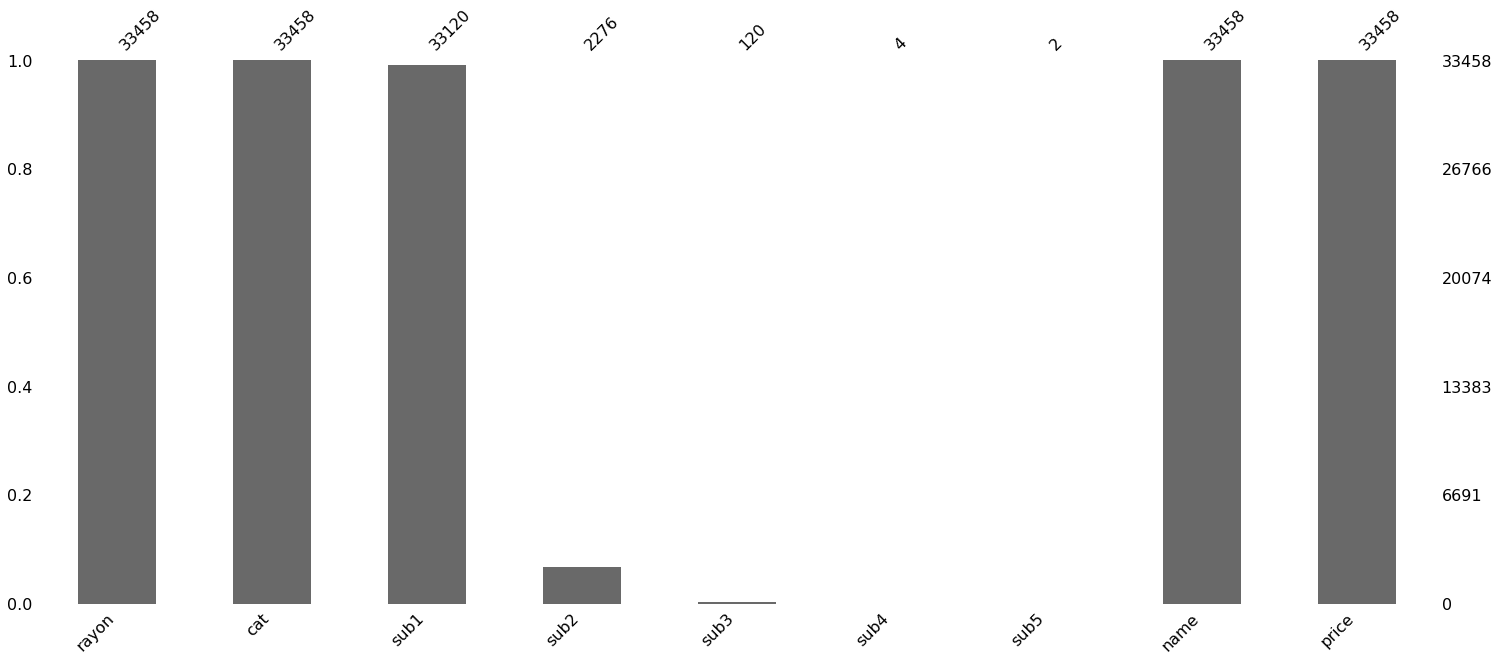

In [8]:
msno.bar(df)
#remove the guys that have sub3 or sub4 for the overall analysis ( can be retreived if needed)
#to do this we will merge all the subs in sub 1 


In [21]:
#df["sub"] = pd.Series((df["sub1"].fillna('')+";"+df["sub2"].fillna('')+";"+df["sub3"].fillna('')+";"+df["sub4"].fillna('')+";"+df["sub5"].fillna('')))
df.loc[:,"sub1":"sub5"] = df.loc[:,"sub1":"sub5"].fillna('')
#TODO : before fill na add > to each sub min 2 winti tali3 , wba3d fill na with empty string wba3d concatenatihom 

TypeError: Can only merge Series or DataFrame objects, a <class 'bool'> was passed

In [123]:
df.sub

<bound method flex_arith_method_FRAME.<locals>.f of                              rayon                              cat  \
0                     INFORMATIQUE  Pï¿½riphï¿½riques & Accessoires   
1                     INFORMATIQUE  Pï¿½riphï¿½riques & Accessoires   
2                     INFORMATIQUE  Pï¿½riphï¿½riques & Accessoires   
3                     INFORMATIQUE  Pï¿½riphï¿½riques & Accessoires   
4                     INFORMATIQUE  Pï¿½riphï¿½riques & Accessoires   
...                            ...                              ...   
25763  MAISON | BRICO & ANIMALERIE                       ANIMALERIE   
25764  MAISON | BRICO & ANIMALERIE                       ANIMALERIE   
25765  MAISON | BRICO & ANIMALERIE                       ANIMALERIE   
25766  MAISON | BRICO & ANIMALERIE                       ANIMALERIE   
25767  MAISON | BRICO & ANIMALERIE                       ANIMALERIE   

                   sub1 sub2 sub3 sub4 sub5  \
0      Clavier & Souris  NaN  NaN  NaN  NaN   
1

In [124]:
df = df.drop(columns=["sub1","sub2","sub3","sub4","sub5"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25768 entries, 0 to 25767
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rayon   25768 non-null  object 
 1   cat     25732 non-null  object 
 2   name    25768 non-null  object 
 3   price   25768 non-null  float64
 4   sub     25768 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1006.7+ KB


rayon    36
cat       0
name     36
price    36
sub      36
dtype: int64

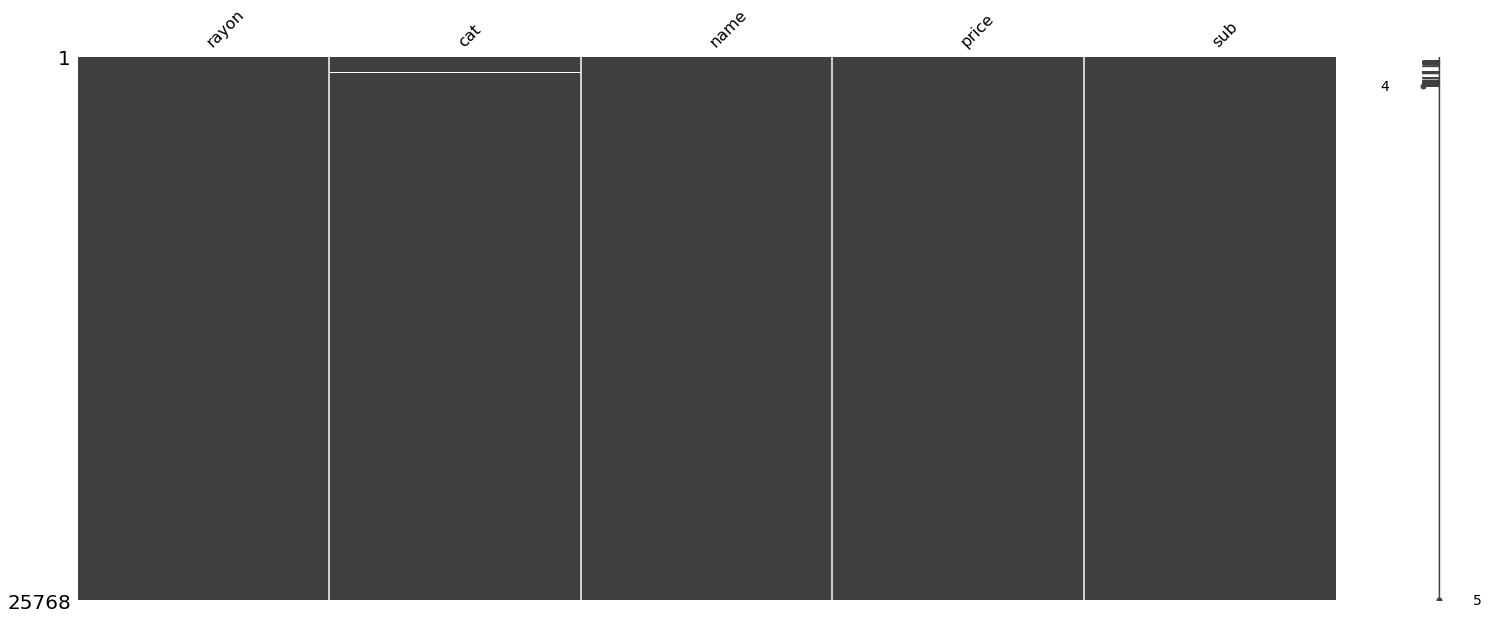

In [136]:
msno.matrix(df.sort_values(by='sub'))
df[df.isna().cat].count()